In [18]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [19]:
def signalGenerator(N, a, f, seconds):
    # Numero de muestras
    # Amplitud de los tonos (armonicos)
    # frecuencia de cada armonico

    # Inicializamos la señal resultante
    signal = np.zeros(N)

    # Intervalo de la señal [0, segundos] en N pasos.
    time = np.linspace(0, seconds, N)

    num_tone = len(a)


    # Generamos la señal
    for n in range(num_tone):
        signal += a[n] * np.sin(2*math.pi*f[n]*time)  

    return time, signal


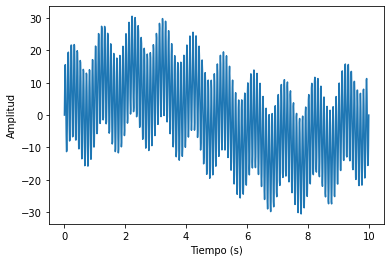

In [39]:
x, y = signalGenerator(N=1000, a =[5, 10, 1, 15], f=[1, 100, 1000, 1e4], seconds=10)

plt.plot(x, y)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()

In [21]:
def noiseSignalGenerator(N, a, f, seconds, noise):
    # Numero de muestras
    # Amplitud de los tonos (armonicos)
    # frecuencia de cada armonico
    # Ruido gausiano

    # Inicializamos la señal resultante
    signal = np.zeros(N)

    # Intervalo de la señal [0, segundos] en N pasos.
    time = np.linspace(0, seconds, N)

    num_tone = len(a)


    # Generamos la señal
    for n in range(num_tone):
        signal += a[n] * np.sin(2*math.pi*f[n]*time)  
    
    # Algun ruido añadido a la señal
        # loc = media
        # scale = desviación standard
        # size = int o tuple con el tamaño del array
    signal += np.random.normal(loc=0, scale=noise, size=N)

    return time, signal

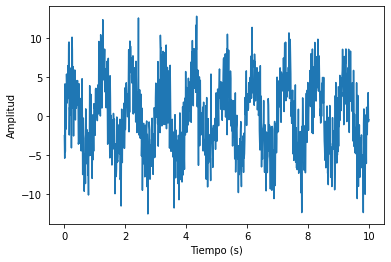

In [22]:
x, y = noiseSignalGenerator(N=1000, a =[5], f=[1], seconds=10, noise=3)

plt.plot(x, y)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()

In [31]:
def aproxEntropy(U, m, r):

    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))

    N = len(U)

    return abs(_phi(m + 1) - _phi(m))

In [35]:
x, y = noiseSignalGenerator(N=100, a =[2], f=[5], seconds=10, noise=5)

print(aproxEntropy(y, 1, 0.2 * np.std(x)))

1.6160363512224705


In [25]:
# RESUMEN
# A más ruido -> Aumenta la entropía de la señal
# A más tonos -> Aumenta la entropía de la señal

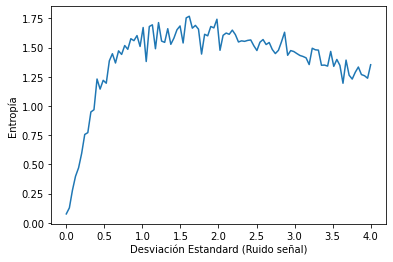

In [37]:

# Nivel de entropía conforme aumentamos la deviación del ruido de la señal 

N = 100
s = np.linspace(0, 4, N)
entropy_sum = np.zeros(N)

for i in range(N):
    _, y = noiseSignalGenerator(N=N, a=[2], f=[5], seconds=10, noise=s[i])
    sdy = np.std(x)
    entropy_sum[i] += aproxEntropy(y, 1, 0.1 * sdy)
plt.plot(s, entropy_sum)
plt.xlabel('Desviación Estandard (Ruido señal)')
plt.ylabel('Entropía')
plt.show()
